In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [ ]:
import matplotlib.pyplot as plt

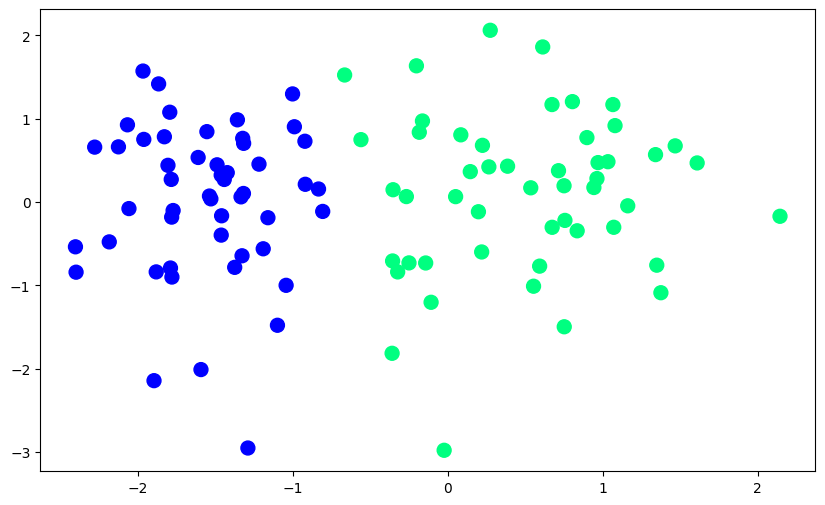

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [ ]:
def step(z):
    return 1 if z>0 else 0

In [ ]:
intercept_,coef_ = perceptron(X,y)

In [ ]:
print(coef_)
print(intercept_)

[1.37300097 0.16359407]
0.9


In [ ]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

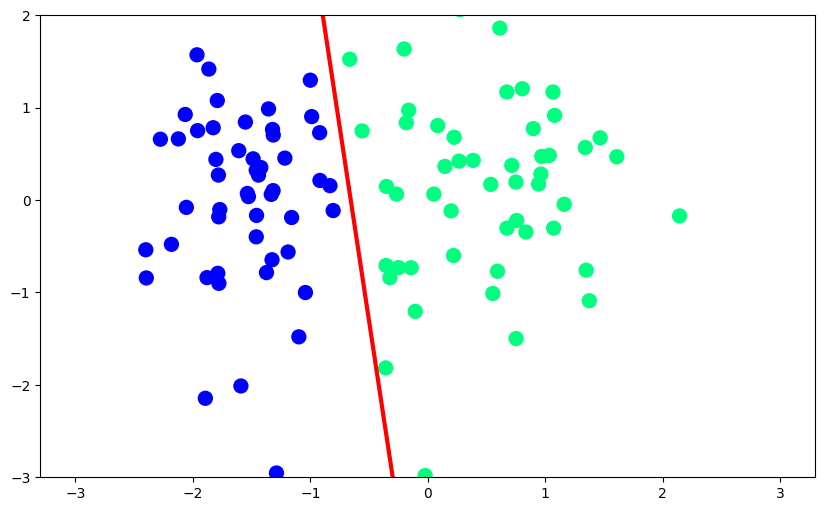

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

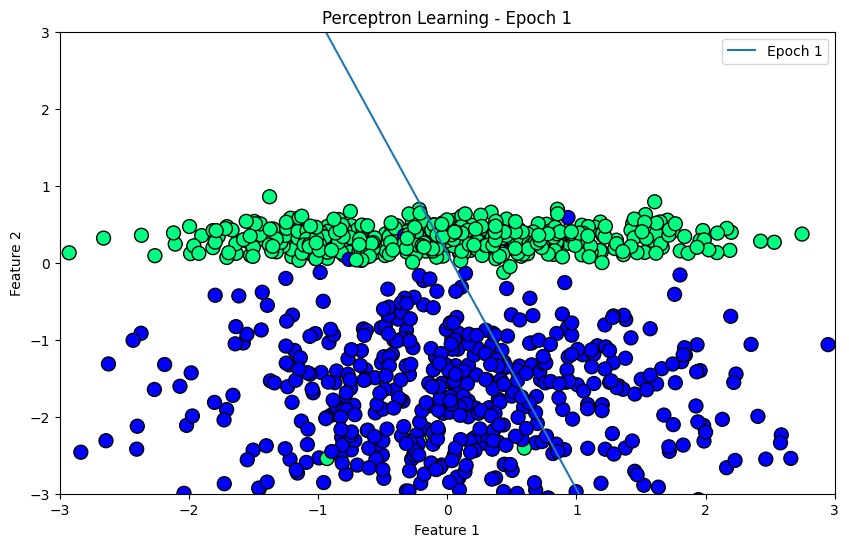

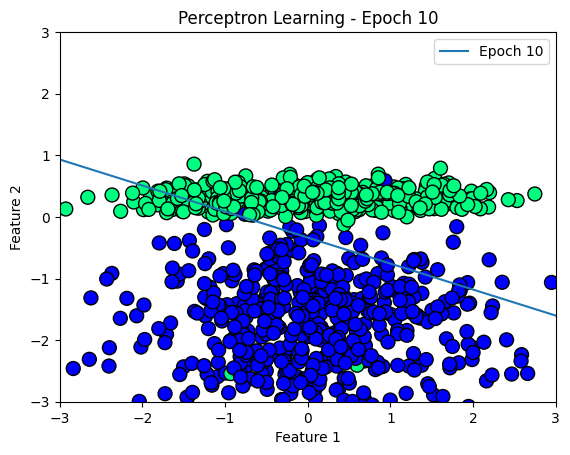

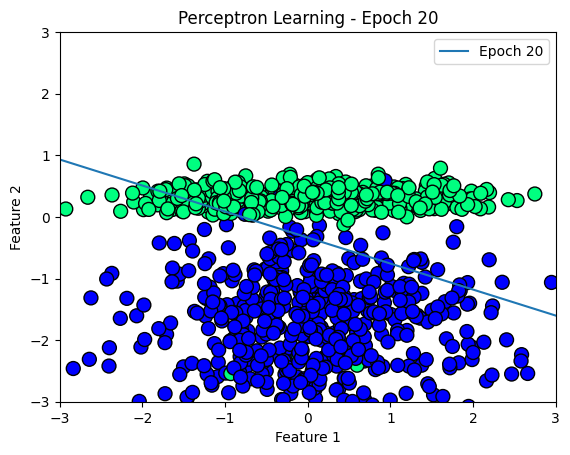

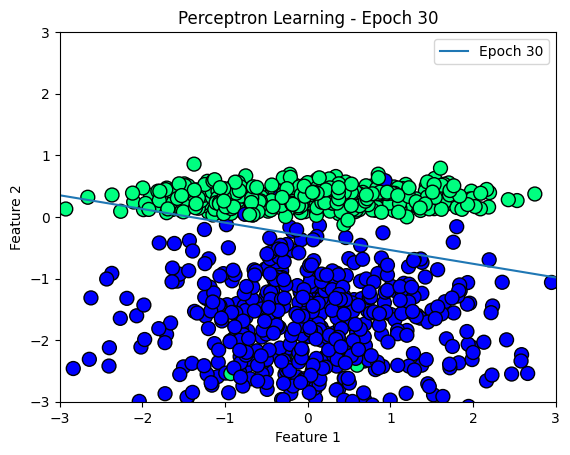

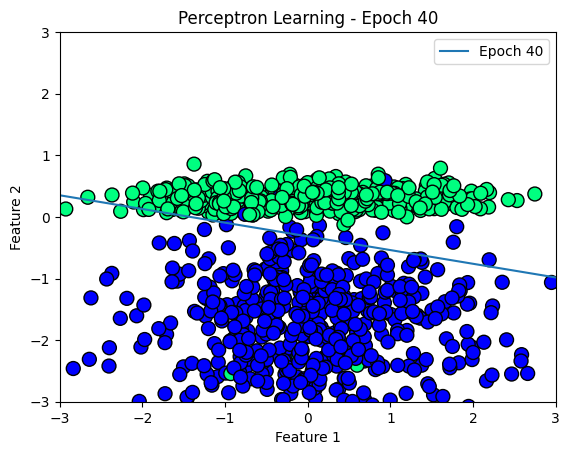

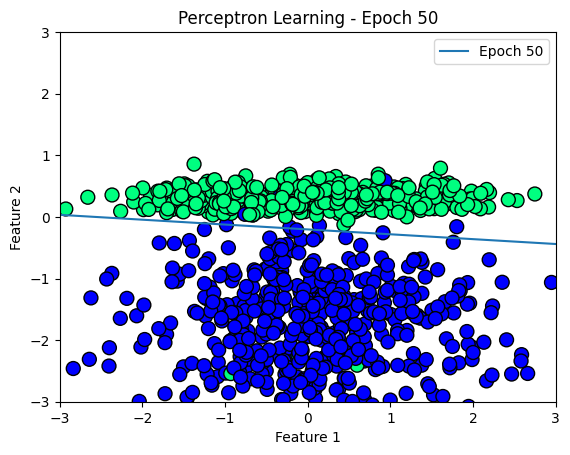

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# === 1. Create a larger dataset ===
X, y = make_classification(n_samples=1000, n_features=2, n_informative=1,
                           n_redundant=0, n_classes=2, n_clusters_per_class=1,
                           random_state=41, hypercube=False, class_sep=10)

# Add bias term (column of ones)
X = np.insert(X, 0, 1, axis=1)

# Initialize weights randomly
weights = np.random.randn(X.shape[1])
lr = 0.1  # Learning rate

# Step function for binary classification
def step(z):
    return 1 if z > 0 else 0

# === 2. Set up Plot ===
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='winter', s=100, edgecolors='k')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Learning with Decision Boundary")

# Store the decision boundary for specific epochs
epochs_to_plot = [1, 10, 20, 30, 40, 50]

# === 3. Training loop with live updates ===
for epoch in range(50):
    j = np.random.randint(0, 400)  # Pick a random data point
    y_hat = step(np.dot(X[j], weights))  # Prediction
    weights += lr * (y[j] - y_hat) * X[j]  # Update weights based on error

    # Plot decision boundary for selected epochs
    if epoch + 1 in epochs_to_plot:
        if weights[2] != 0:
            # Calculate the decision boundary
            x_vals = np.linspace(-3, 3, 100)
            m = -weights[1] / weights[2]  # Slope
            b = -weights[0] / weights[2]  # Intercept
            y_vals = m * x_vals + b

            # Clear the previous plot and plot the new decision boundary
            plt.clf()  # Clear the current figure
            plt.scatter(X[:, 1], X[:, 2], c=y, cmap='winter', s=100, edgecolors='k')
            plt.xlim(-3, 3)
            plt.ylim(-3, 3)

            # Plot the new decision boundary
            plt.plot(x_vals, y_vals, label=f"Epoch {epoch+1}")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.title(f"Perceptron Learning - Epoch {epoch+1}")
            plt.legend()

            # Pause to create real-time animation effect
            plt.pause(0.1)

# Show the final plot after all epochs
plt.show()
